In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcSSQ(ordered_data):
    differences = np.diff(ordered_data, axis=1)
    sum_of_squares = np.sum(differences ** 2, axis=0)
    return sum_of_squares

In [49]:
class InfSys:
    def __init__(self, num_people, num_timesteps):
        self.num_people = num_people
        self.num_timesteps = num_timesteps

    def generate(self):
        # Generate random timeseries data (each row is an individual, each column is a timestep)
        self.value_timeseries_data = np.random.rand(self.num_people, self.num_timesteps) * 10  # Random real values
        
        # Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
        self.ranked_timeseries_data = np.argsort(np.argsort(self.value_timeseries_data, axis=0), axis=0) + 1

    def calcRankedSSQ(self):
        self.ranked_ssq = calcSSQ(self.ranked_timeseries_data)
        return self.ranked_ssq

    def calcValueSSQ(self):
        self.value_ssq = calcSSQ(self.value_timeseries_data)
        return self.value_ssq

    def plot_hist(self, data, ax=None):
        timeseries_df = pd.DataFrame(data, columns=[f"SSQ-{self.num_people}"], index=[f"T{i}" for i in range(1, self.num_timesteps)])
        if ax is None:
            timeseries_df.hist(bins=100)#, density=True)
        else:
            timeseries_df.hist(bins=100, ax=ax)#, density=True)
        # plt.xscale('log')
        # plt.yscale('log')

    def calc_all(self):
        self.calcRankedSSQ()
        self.calcValueSSQ()

array([<Axes: title={'center': '0'}>], dtype=object)

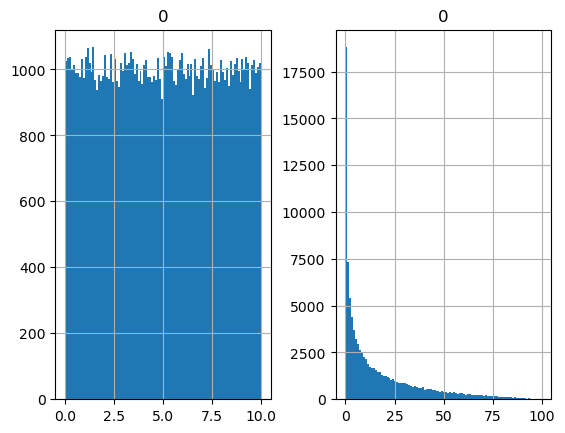

In [50]:
thisSys = InfSys(1, 100000)
thisSys.generate()
thisSys.calc_all()

fig, (ax1, ax2) = plt.subplots(1,2)
pd.DataFrame(thisSys.value_timeseries_data[0]).hist(bins=100, ax=ax1)
pd.DataFrame(thisSys.value_ssq).hist(bins=100, ax=ax2)

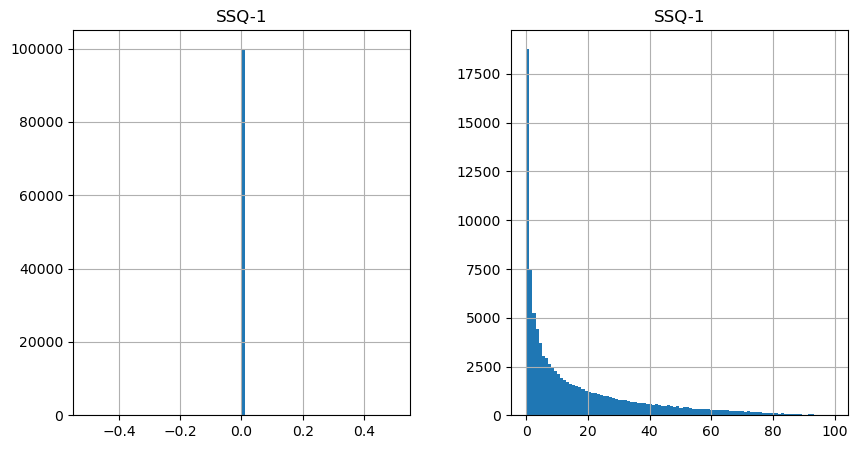

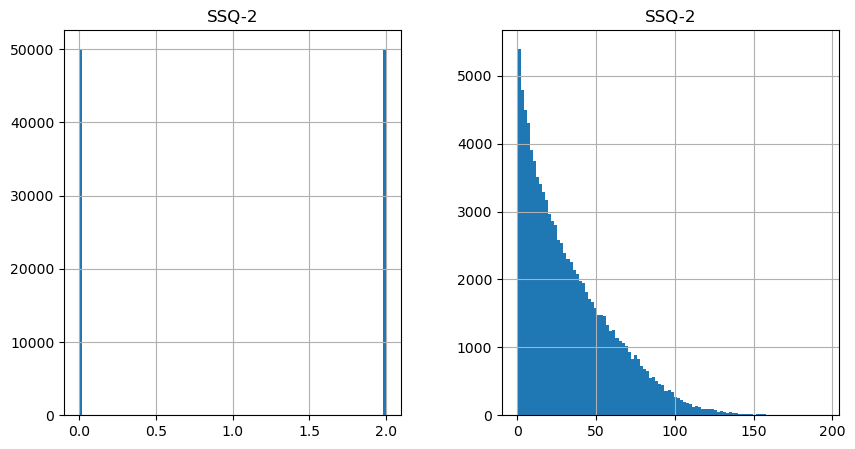

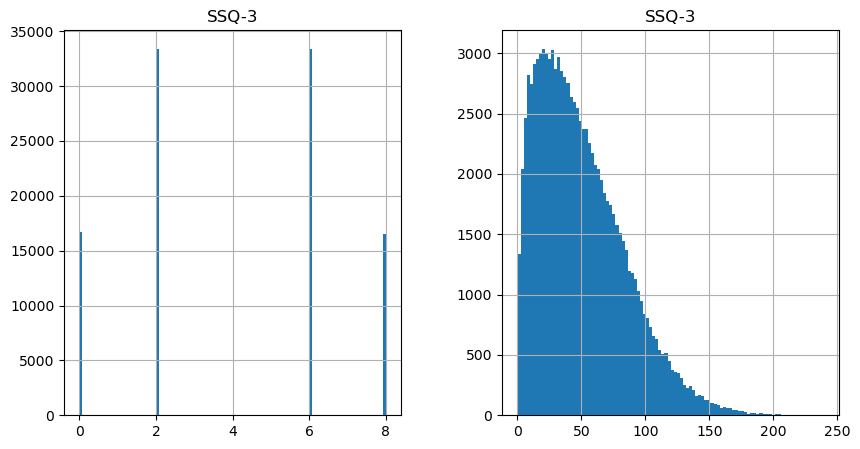

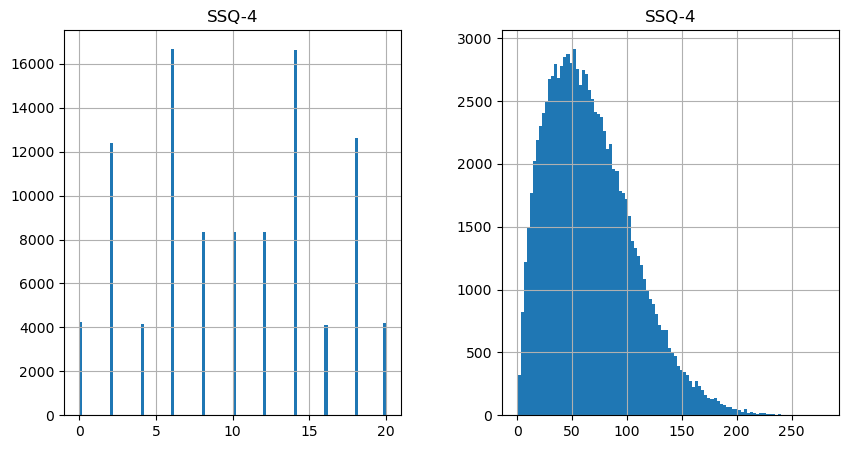

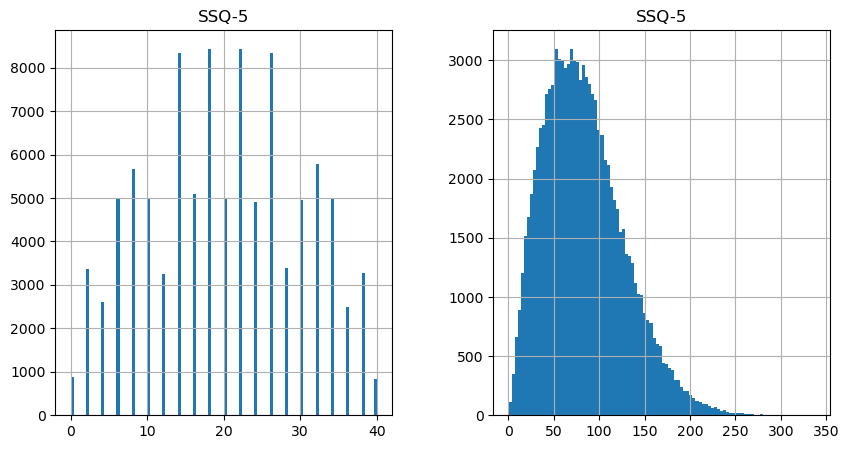

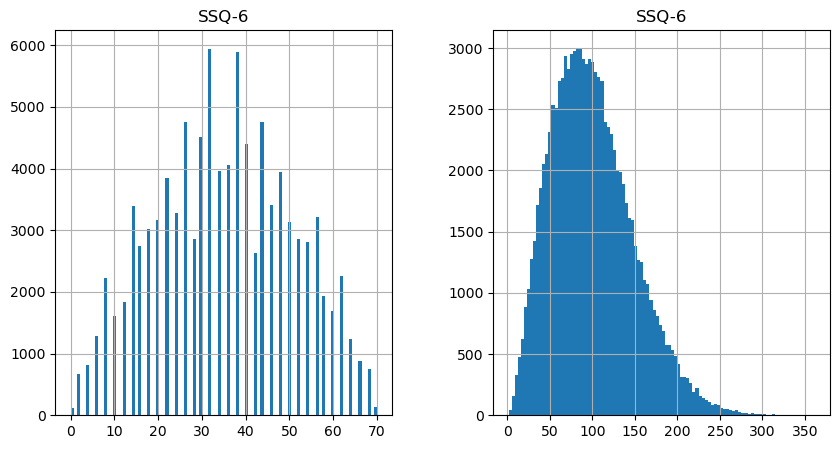

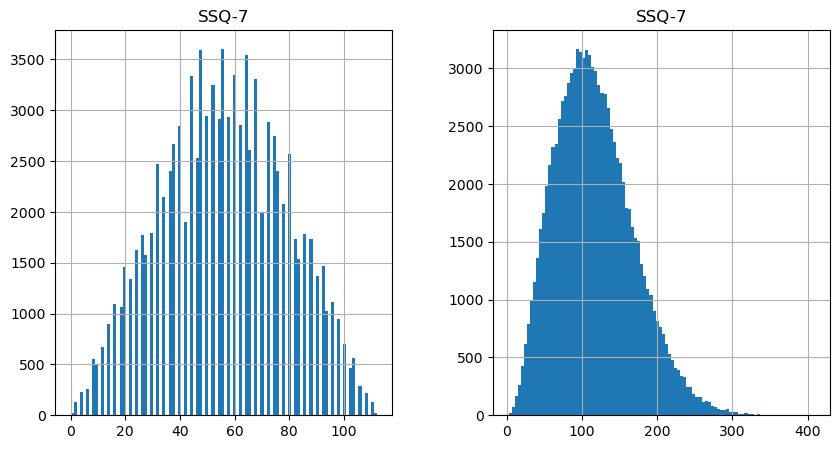

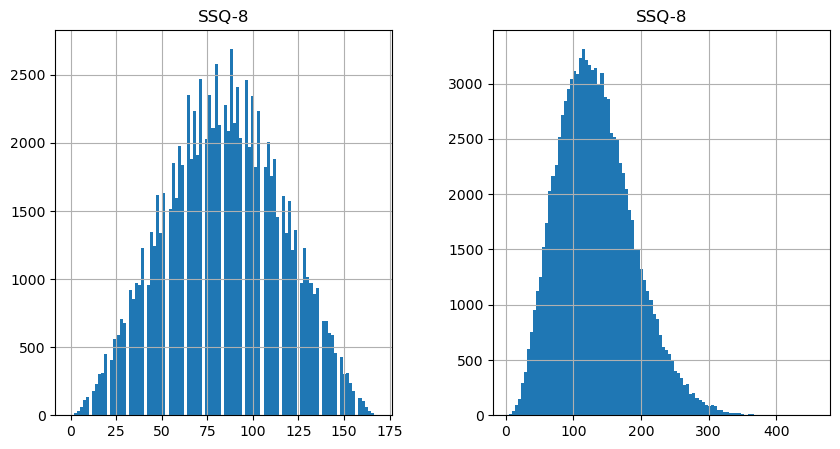

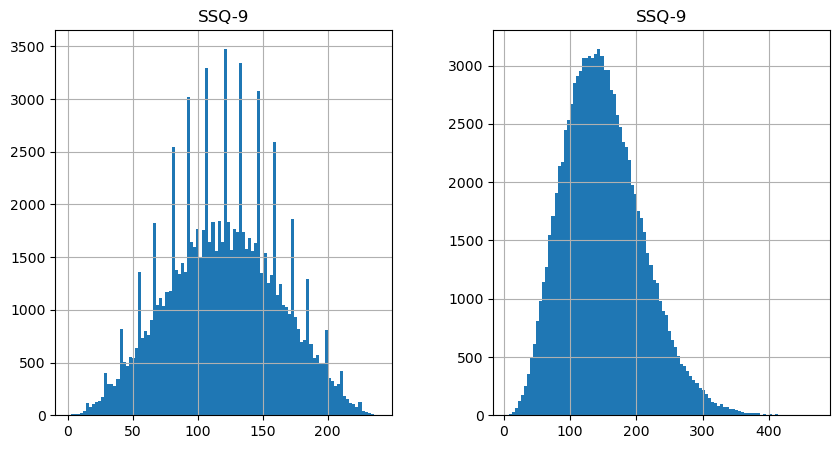

In [54]:
num_samples = 100000
for num_people in range(1,10):
    thisSys = InfSys(num_people, num_samples)
    thisSys.generate()
    thisSys.calc_all()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    thisSys.plot_hist(thisSys.ranked_ssq, ax1)
    thisSys.plot_hist(thisSys.value_ssq, ax2)
    plt.show()

In [14]:
# Parameters
num_people = 3  # Number of individuals
num_timesteps = 10000  # Number of timesteps

# Generate random timeseries data (each row is an individual, each column is a timestep)
timeseries_data = np.random.rand(num_people, num_timesteps) * 10  # Random real values

# Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
ranked_data = np.argsort(np.argsort(timeseries_data, axis=0), axis=0) + 1

In [15]:
pd.DataFrame(timeseries_data)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,9.233144,3.218542,0.554110,3.766275,8.233053,7.887268,5.348408,3.004933,0.954494,1.633284,...,9.725171,3.036037,2.801585,7.873982,5.062869,2.631849,9.216147,3.798421,0.721057,2.407368
1,1.063290,6.402141,0.052879,6.243438,2.664416,9.574065,4.961005,6.382738,1.777637,1.879457,...,0.128684,9.914605,9.938212,8.162638,2.339092,5.270603,2.174701,0.472039,9.707728,1.268912
2,8.724047,0.988300,5.235730,0.004424,1.809804,1.748804,1.746045,4.020575,8.162721,3.001686,...,8.625638,7.728935,2.743881,6.727936,2.282801,6.636768,8.208580,9.126538,4.187820,5.214238


In [16]:
pd.DataFrame(ranked_data)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,3,2,2,2,3,2,3,1,1,1,...,3,1,2,2,3,1,3,2,1,2
1,1,3,1,3,2,3,2,3,2,2,...,1,3,3,3,2,2,1,1,3,1
2,2,1,3,1,1,1,1,2,3,3,...,2,2,1,1,1,3,2,3,2,3


In [17]:
differences = np.diff(ranked_data, axis=1)
pd.DataFrame(differences)

,0,1,2,3,4,5,6,7,8,9,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998
0,-1,0,0,1,-1,1,-2,0,0,0,...,1,-2,1,0,1,-2,2,-1,-1,1
1,2,-2,2,-1,1,-1,1,-1,0,1,...,-2,2,0,0,-1,0,-1,0,2,-2
2,-1,2,-2,0,0,0,1,1,0,-1,...,1,0,-1,0,0,2,-1,1,-1,1


In [18]:
sum_of_squares = np.sum(differences ** 2, axis=0)
sum_of_squares

array([6, 8, 8, ..., 2, 6, 6], dtype=int64)

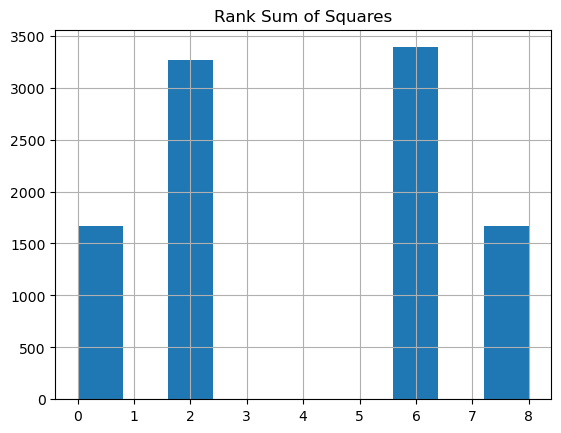

In [19]:
rank_timeseries_df = pd.DataFrame(sum_of_squares, columns=["Rank Sum of Squares"], index=[f"T{i}" for i in range(1, num_timesteps)])
rank_timeseries_df.hist()
plt.show()

In [36]:




# Compute sum of squares of differences for each individual across timesteps
differences = np.diff(timeseries_data, axis=1)  # Compute differences between consecutive timesteps
sum_of_squares = np.sum(differences**2, axis=0)  # Sum of squares over individuals

# Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
ranked_data = np.argsort(np.argsort(timeseries_data, axis=0), axis=0) + 1

# Compute sum of squares of differences for ranks
rank_differences = np.diff(ranked_data, axis=1)  # Compute differences between consecutive timesteps
rank_sum_of_squares = np.sum(rank_differences**2, axis=0)  # Sum of squares over individuals

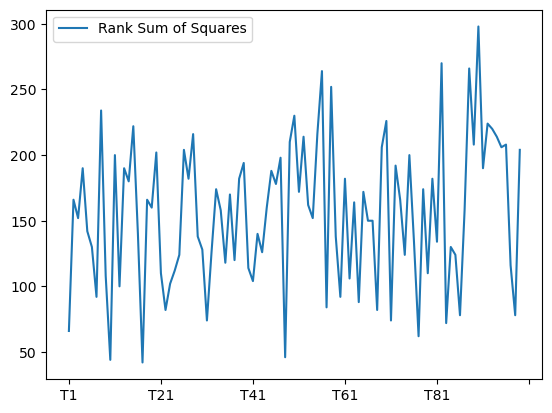

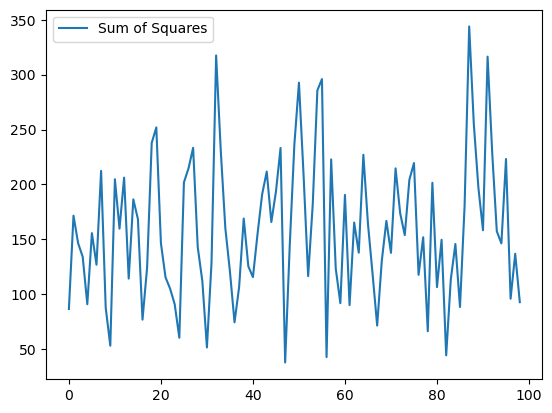

In [39]:
rank_timeseries_df = pd.DataFrame(rank_sum_of_squares, columns=["Rank Sum of Squares"], index=[f"T{i}" for i in range(1, num_timesteps)])
rank_timeseries_df.plot()
timeseries_df = pd.DataFrame(sum_of_squares, columns=["Sum of Squares"])
timeseries_df.plot()
plt.show()

In [40]:
import pandas as pd
df = pd.read_csv(r'c:\Users\pog66\Downloads\ihbem\Awards.csv', encoding='ISO-8859-1')

In [42]:
df.columns

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [47]:
df[df['PrincipalInvestigator'].apply(lambda x: "Shuai" in x)]

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract


In [61]:
df[df['Co-PIName(s)'].apply(lambda x: "Shuai" in x if type(x) is str else False)]

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract


In [62]:
df['OrganizationStreet']

0                         5200 N LAKE RD
1                     2145 N TANANA LOOP
2              9201 UNIVERSITY CITY BLVD
3       1320 SOUTH DIXIE HIGHWAY STE 650
4                        506 S WRIGHT ST
                     ...                
297              250 BEDFORD PARK BLVD W
298                      1600 HAMPTON ST
299    400 HARVEY MITCHELL PKY S STE 300
300                    107 S INDIANA AVE
301                         1 SILBER WAY
Name: OrganizationStreet, Length: 302, dtype: object